# Lending Club Case Study

## Business Understanding

We need to identify key driving factors for loan defaults to improve risk assessment and minimize financial losses in our lending portfolio.

### Assumptions :
- Loan requests on LendingClub are graded and listed for investment. Investors choose which loan listings to invest in based on loan details and borrower information.
- Only those variables be chosen for analysis that will be available to the investor at the time of deciding whether to invest in a loan request or not.

In [1]:
# suppress warnings
import warnings
warnings.simplefilter(action='ignore')

In [2]:
# imports for the case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# set display options
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

In [4]:
# Open the data dictionary for easy reference
data_dict = pd.read_excel('Data_Dictionary.xlsx').dropna()
data_dict.style.set_properties(subset=['Description'], **{'width': '1200px'})

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


## Loading & understanding the data
First we load the given data file and then try to understand the given data. We look at few of its rows, shape, column types, meaning of each column using the data_dict above.

In [5]:
df1 = pd.read_csv("loan.csv")

In [6]:
df1.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
df1.shape

(39717, 111)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [9]:
df1.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Data Preparation

In [10]:
# There are 111 columns and on browsing the csv file , we see many columns with values as nulls. Let us check those.
df1.isnull().mean(axis=0) * 100 

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.585543
purpose                             0.000000
title                               0.027696
zip_code  

In [11]:
# find the columns with more than 50% null values
cols_to_del = df1.columns[df1.isnull().mean(axis=0) > 0.5]
cols_to_del

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

#### Deleting the cols with significant null values

In [12]:
# drop the columns with more than 50% null values
df1.drop(columns = cols_to_del, inplace = True)
df1.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [13]:
df1.shape

(39717, 54)

#### Checking the unique values of various columns

In [14]:
num_cols = list(df1.select_dtypes('number').columns)
cat_cols = list(df1.select_dtypes('object').columns)

In [15]:
num_cols

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

In [16]:
cat_cols

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [17]:
for i in cat_cols:
    print(i, df1[i].value_counts())
    print("========================================\n")

term term
36 months    29096
60 months    10621
Name: count, dtype: int64

int_rate int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
7.49%     656
11.71%    607
9.99%     603
7.90%     582
5.42%     573
11.99%    532
12.69%    491
10.37%    468
6.03%     447
12.99%    446
8.49%     445
12.42%    442
10.65%    435
5.79%     410
8.90%     402
7.29%     397
6.62%     396
11.86%    391
14.27%    390
10.59%    380
9.63%     378
9.91%     377
5.99%     347
7.14%     341
6.99%     336
11.11%    331
12.53%    327
16.77%    327
10.74%    312
6.54%     305
6.91%     303
8.94%     294
7.66%     292
13.61%    291
15.99%    286
13.98%    284
13.23%    263
11.12%    259
13.99%    257
6.17%     252
10.00%    251
12.68%    251
10.75%    250
10.36%    250
11.36%    247
16.49%    241
11.83%    233
18.25%    230
10.62%    228
14.65%    222
13.06%    220
10.38%    219
10.25%    218
15.23%    215
14.96%    214
16.89%    209
15.65%    208
11.14%    206
6.92%     204
12.18%    2

In [18]:
for i in cat_cols:
    print(i, df1[i].nunique())

term 2
int_rate 371
grade 7
sub_grade 35
emp_title 28820
emp_length 11
home_ownership 5
verification_status 3
issue_d 55
loan_status 3
pymnt_plan 1
url 39717
desc 26526
purpose 14
title 19615
zip_code 823
addr_state 50
earliest_cr_line 526
revol_util 1089
initial_list_status 1
last_pymnt_d 101
last_credit_pull_d 106
application_type 1


#### Deleting the categoical cols based on unique values

In [19]:
# as there is no variation in the value of these categorical colums, drop them
cols_to_del = ['pymnt_plan', 'initial_list_status', 'application_type']
df1.drop(columns = cols_to_del, inplace = True)
df1.shape

(39717, 51)

In [20]:
# desc column is not useful as we are not intending to do any kind of sentiment analysis. Also too many unique values of categorical types will not 
# aid to our analysis, so dropping few more cols based on their interpretation from data_dict. Also encrypted zip_code won't be useful for the analysis
cols_to_del = ['emp_title', 'url', 'desc', 'title','zip_code']
df1.drop(columns = cols_to_del, inplace = True)
df1.shape

(39717, 46)

#### Deleting the numerical cols based on unique values

In [21]:
for i in num_cols:
    print(i, df1[i].nunique())

id 39717
member_id 39717
loan_amnt 885
funded_amnt 1041
funded_amnt_inv 8205
installment 15383
annual_inc 5318
dti 2868
delinq_2yrs 11
inq_last_6mths 9
open_acc 40
pub_rec 5
revol_bal 21711
total_acc 82
out_prncp 1137
out_prncp_inv 1138
total_pymnt 37850
total_pymnt_inv 37518
total_rec_prncp 7976
total_rec_int 35148
total_rec_late_fee 1356
recoveries 4040
collection_recovery_fee 2616
last_pymnt_amnt 34930
collections_12_mths_ex_med 1
policy_code 1
acc_now_delinq 1
chargeoff_within_12_mths 1
delinq_amnt 1
pub_rec_bankruptcies 3
tax_liens 1


In [22]:
# as there is no variation in the value of these numerical colums, drop them
cols_to_del = ['policy_code','acc_now_delinq','delinq_amnt','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens']
df1.drop(columns = cols_to_del, inplace = True)
df1.shape

(39717, 40)

In [23]:
# Columns like id, member_id etc will not be useful for analysis as we are not cross referencing to another dataset , drop them
cols_to_del = ['id', 'member_id']
df1.drop(columns = cols_to_del, inplace = True)
df1.shape

(39717, 38)

#### Deleting the numerical cols based on customer behaviour

In [24]:
# Columns below will not be useful for analysis as these relate to customer behaviour after the loan is provided to them
cols_to_del = ['delinq_2yrs', 'revol_bal', 'revol_util', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt']
df1.drop(columns = cols_to_del, inplace = True)
df1.shape

(39717, 31)

#### Checking and correcting the data types of few columns

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

##### Changing the type of 'term' & 'int_rate' and extracting only the numeric value

In [26]:
df1['term'].value_counts()

term
36 months    29096
60 months    10621
Name: count, dtype: int64

In [27]:
df1['term'].dtype

dtype('O')

In [28]:
df1['term'] = df1['term'].apply(lambda x : int(x.split()[0]))

In [29]:
df1['term'].value_counts()

term
36    29096
60    10621
Name: count, dtype: int64

In [30]:
df1['term'].dtype

dtype('int64')

In [31]:
df1['int_rate'] = df1['int_rate'].str.strip('%').astype('float')

##### Changing the type of 'emp_length', imputing the null value with 0

In [32]:
# Check the unique values and their counts 
df1['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [33]:
df1['emp_length'].isnull().sum()

1075

In [34]:
#Imputing the missing values as 0, assuming that borrower may not have work experience yet 
df1['emp_length'].fillna(value=0, inplace=True)
#Replacing other ones with a regex pattern to extract the numbers from the text field
df1['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df1['emp_length'] = df1['emp_length'].astype('int64')

##### Changing the type of columns showing month-year

In [35]:
# Below columns are having date/month information but are of the type object in the dataset. Let us modify their dtype to datetime.
dt_cols = ['issue_d','earliest_cr_line', 'last_credit_pull_d']
for i in dt_cols:
    df1[i]= pd.to_datetime(df1[i], format='%b-%y')

##### Derived metrics

In [36]:
# issue_d : Loan issued date is an importnat field that can help us in categorising based on month and year, so we can create derived fields
df1['issue_d_year'] = df1.issue_d.dt.year
df1['issue_d_month'] = df1.issue_d.dt.month

##### Checking the target column

In [37]:
# target column Loan status ..this is what we want to predict or analyse what affects this outcome
df1['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [38]:
# filtering only fully paid or charged-off types as 'Current' rows would not add any intelligence for knowing what feature would affect a loan status. 
# Lets also convert loan_status as a integer field for calculating corelation with other fields.
df = df1[df1['loan_status'] != 'Current'].copy()
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
df['loan_status'].value_counts()

loan_status
0    32950
1     5627
Name: count, dtype: int64

#### Converting columns with numeric values to categorical

We will create bins for few continuous variables and use them as categorical features. This will help with better analysis

In [39]:
df['installment_bins'] = pd.qcut(df['installment'], q=5, labels=['very low','low','medium','high','very high'])
df['installment_bins'].value_counts()

installment_bins
medium       7718
very low     7716
low          7716
very high    7714
high         7713
Name: count, dtype: int64

In [40]:
#Binning loan_amount for a closer look
df['loan_amnt_bins'] = pd.cut(df['loan_amnt'], [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])
df['loan_amnt_bins'].value_counts()

loan_amnt_bins
5-10k     12802
0-5k       9472
10-15k     7683
15-20k     4349
20-25k     2836
30-35k      735
25-30k      700
Name: count, dtype: int64

In [41]:
# We can bin the dti into buckets where min=0 and max=30
df['dti_bins'] = pd.cut(df['dti'], bins=5, labels=['0-6','6-12','12-18','18-24','24-30'])
df['dti_bins'].value_counts()

dti_bins
12-18    11349
6-12     10242
18-24     8918
0-6       6372
24-30     1696
Name: count, dtype: int64

## Data Analysis

Now that we have done the data cleaning, imputation, data type conversion, deriving new metrics, binning the columns etc, we move to the data analysis part. Lets have a view of the remaining columns

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  int64         
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   sub_grade             38577 non-null  object        
 8   emp_length            38577 non-null  int64         
 9   home_ownership        38577 non-null  object        
 10  annual_inc            38577 non-null  float64       
 11  verification_status   38577 non-null  object        
 12  issue_d               38577 non-null  datetime64[ns]
 13  loan_status          

In [43]:
num_cols = list(df.select_dtypes('number').columns)
df[num_cols].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,inq_last_6mths,open_acc,pub_rec,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,pub_rec_bankruptcies,issue_d_year,issue_d_month
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.0,38577.0,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,37880.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,41.898437,11.932219,322.466318,4.925526,6.877797e+04,0.145864,13.272727,0.871737,9.275423,0.055422,22.052648,0.0,0.0,11866.970365,11271.196153,9648.322898,2119.243370,1.368634,0.043479,2010.309070,7.114757
std,7348.441646,7090.306027,7022.720644,10.333136,3.691327,208.639215,3.453921,6.421868e+04,0.352975,6.673044,1.071546,4.401588,0.237804,11.425861,0.0,0.0,8809.856227,8700.845592,7009.381200,2389.499511,7.315880,0.204583,0.882658,3.408523
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,1.000000
25%,5300.000000,5200.000000,5000.000000,36.000000,8.940000,165.740000,2.000000,4.000000e+04,0.000000,8.130000,0.000000,6.000000,0.000000,13.000000,0.0,0.0,5513.497338,5019.590000,4500.000000,643.990000,0.000000,0.000000,2010.000000,4.000000
50%,9600.000000,9550.000000,8733.440000,36.000000,11.710000,277.860000,4.000000,5.886800e+04,0.000000,13.370000,1.000000,9.000000,0.000000,20.000000,0.0,0.0,9674.048405,9066.660000,8000.000000,1300.450000,0.000000,0.000000,2011.000000,7.000000
75%,15000.000000,15000.000000,14000.000000,36.000000,14.380000,425.550000,9.000000,8.200000e+04,0.000000,18.560000,1.000000,12.000000,0.000000,29.000000,0.0,0.0,16136.952430,15329.780000,13175.000000,2671.980000,0.000000,0.000000,2011.000000,10.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,1.000000,29.990000,8.000000,44.000000,4.000000,90.000000,0.0,0.0,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,2.000000,2011.000000,12.000000


In [44]:
# From above we see that ['out_prncp_inv', 'out_prncp'] columns are always 0, so we drop them
cols_to_del = ['out_prncp_inv', 'out_prncp']
df.drop(columns = cols_to_del, inplace = True)

#### Corelation matrix analysis

We have a lot of valriables and we dropped many object type non-categorical variables already. Lets see which variables are corelated

<Axes: >

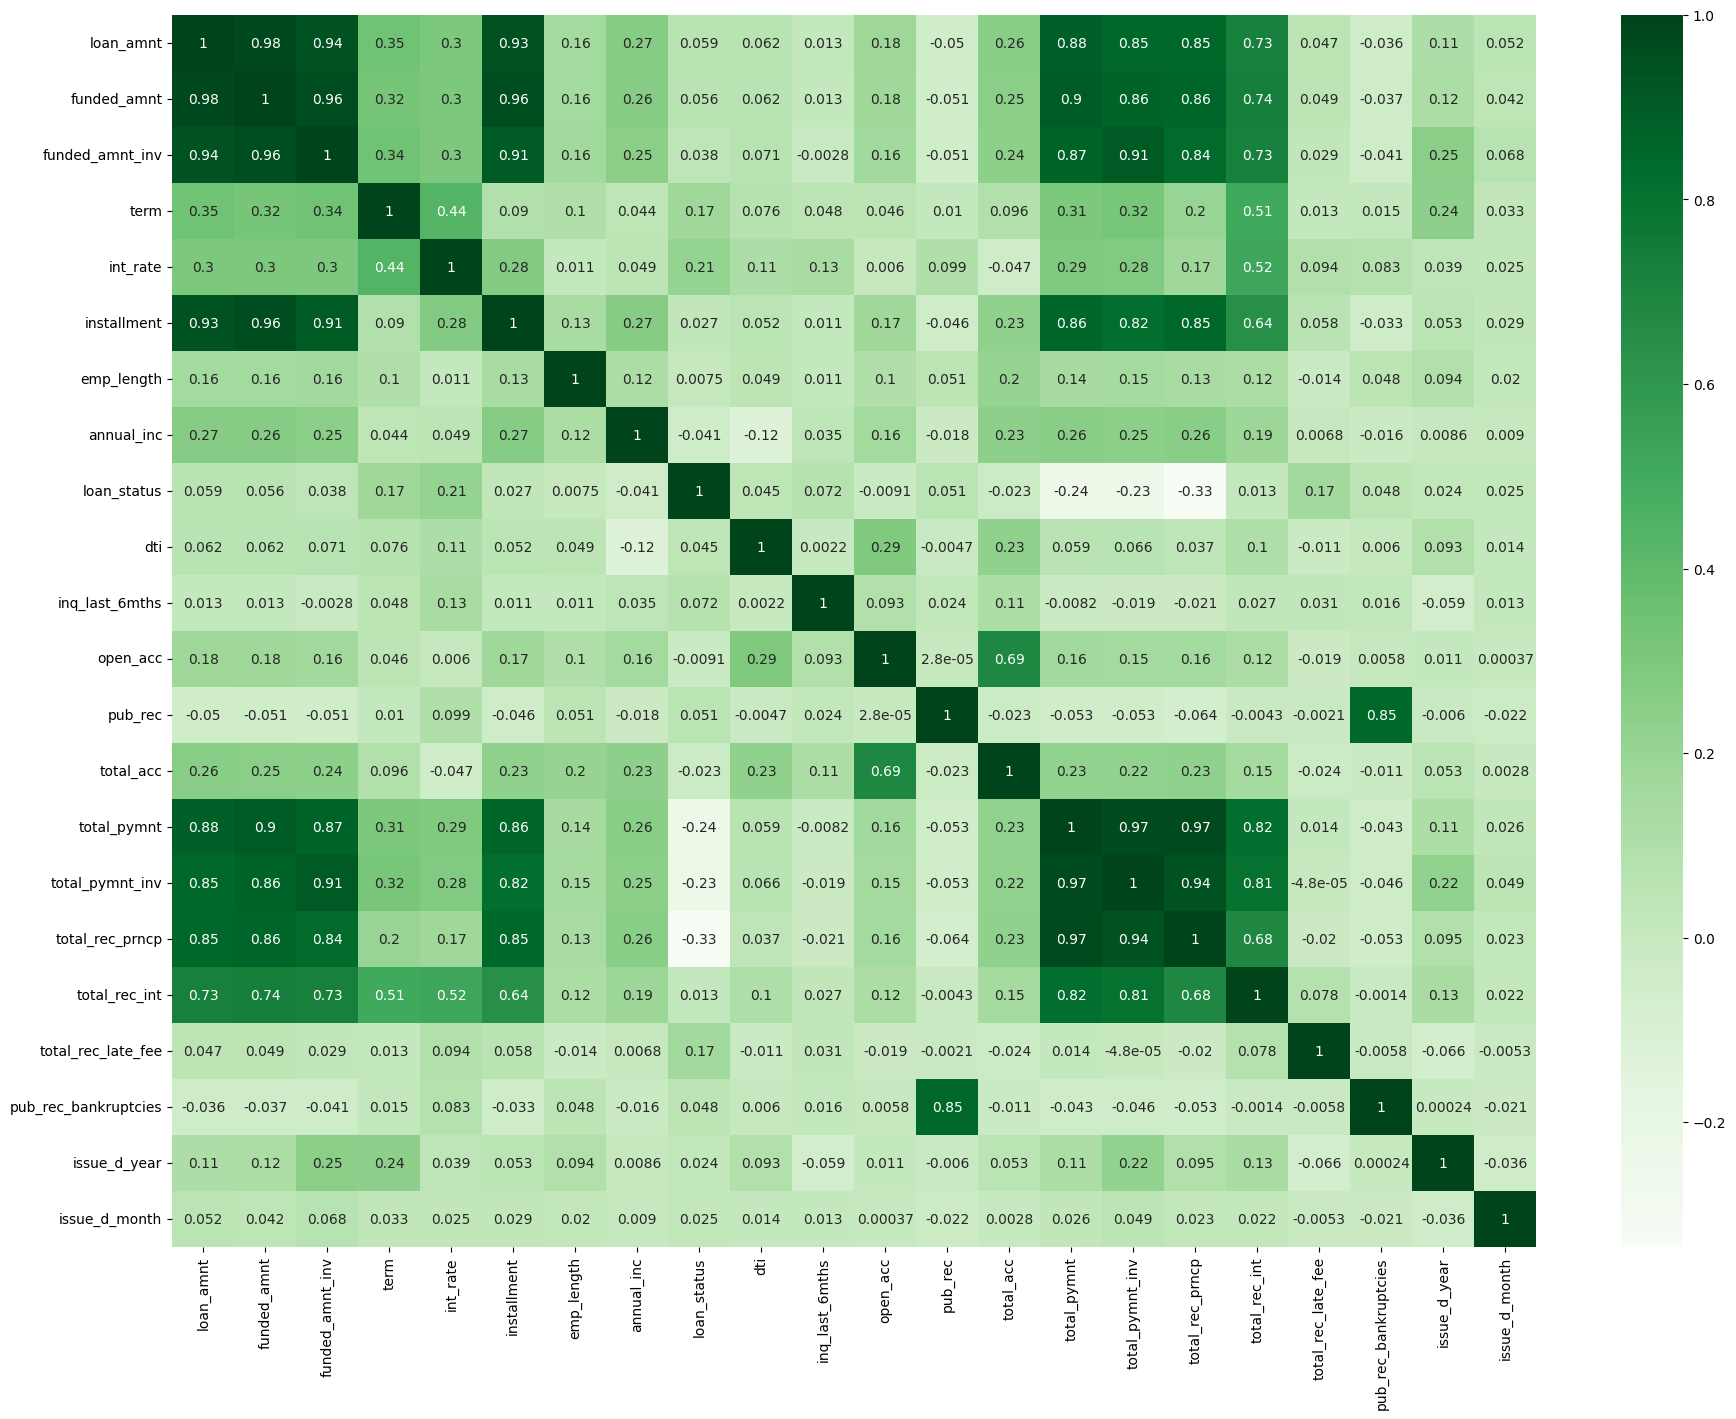

In [45]:
num_cols = list(df.select_dtypes('number').columns)
plt.figure(figsize=(22, 16))
sns.heatmap(df[num_cols].corr(), cmap = 'Greens', annot = True)

We can conclude following from the heatmap :
- loan_amount,funded_amnt,funded_amnt_inv are very highly coorelated , so we can keep one of those i.e loan_amount
- same applies to total_pymnt and total_pymnt_inv. 
- total_rec_prncp also highly corelated but it has medium corelation with total_rec_int , so we would keep both
- installment has strong relationship with loan_amount and total_pymnt fields which makes sense

In [46]:
cols_to_del = ['funded_amnt','funded_amnt_inv','total_pymnt_inv']
df.drop(columns = cols_to_del, inplace = True)

In [47]:
# Lets analyse loan_status correlation with other variables
num_cols = list(df.select_dtypes('number').columns)
df[num_cols].corr()['loan_status'].sort_values(ascending=False)

loan_status             1.000000
int_rate                0.211390
term                    0.173487
total_rec_late_fee      0.165115
inq_last_6mths          0.071878
loan_amnt               0.059463
pub_rec                 0.051001
pub_rec_bankruptcies    0.047757
dti                     0.045078
installment             0.027153
issue_d_month           0.024762
issue_d_year            0.024451
total_rec_int           0.013008
emp_length              0.007550
open_acc               -0.009140
total_acc              -0.022608
annual_inc             -0.040867
total_pymnt            -0.235898
total_rec_prncp        -0.334944
Name: loan_status, dtype: float64

The above list shows the variables which are more correlated (positive or negative) to load_status. We see that int_rate, term, total_pymnt etc have good degree of correlation.

### Univariate Analysis

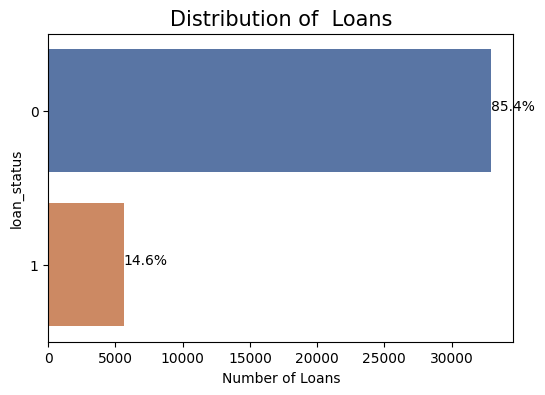

In [48]:
#Distribution of Loan approvals
plt.figure(figsize=(6,4))
ax = sns.countplot(y="loan_status", data=df, palette='deep')
plt.title('Distribution of  Loans', fontsize=15)
plt.xlabel('Number of Loans')

total = len(df['loan_status'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

__Observation: Most of the loans ~85% are full paid, with ~15% being Charged Off__

Text(0, 0.5, 'Density')

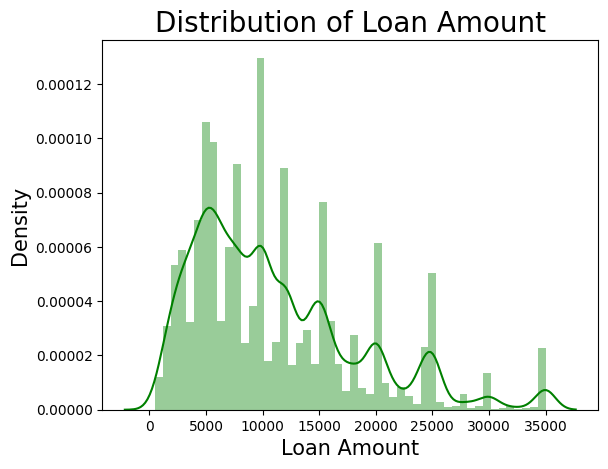

In [49]:
#Distribution of Loan amount
sns.distplot(df['loan_amnt'], color="g")
plt.title("Distribution of Loan Amount",fontsize=20)
plt.xlabel("Loan Amount",fontsize=15)
plt.ylabel("Density",fontsize=15)

__Observation: Loan amount is left skewed. Most of the loan amount given between 5000 to USD 15000__

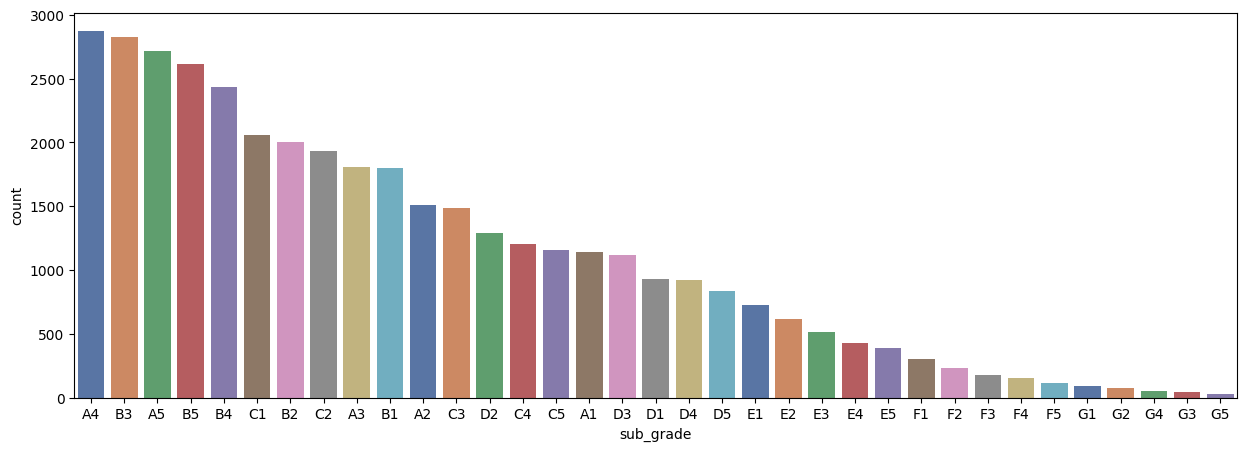

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'sub_grade', order = df['sub_grade'].value_counts().index, palette='deep')
plt.show()

__Observation: With the decrease in sub_grade level, the above plot shows a general trend in the decrease in the number of loans given.__

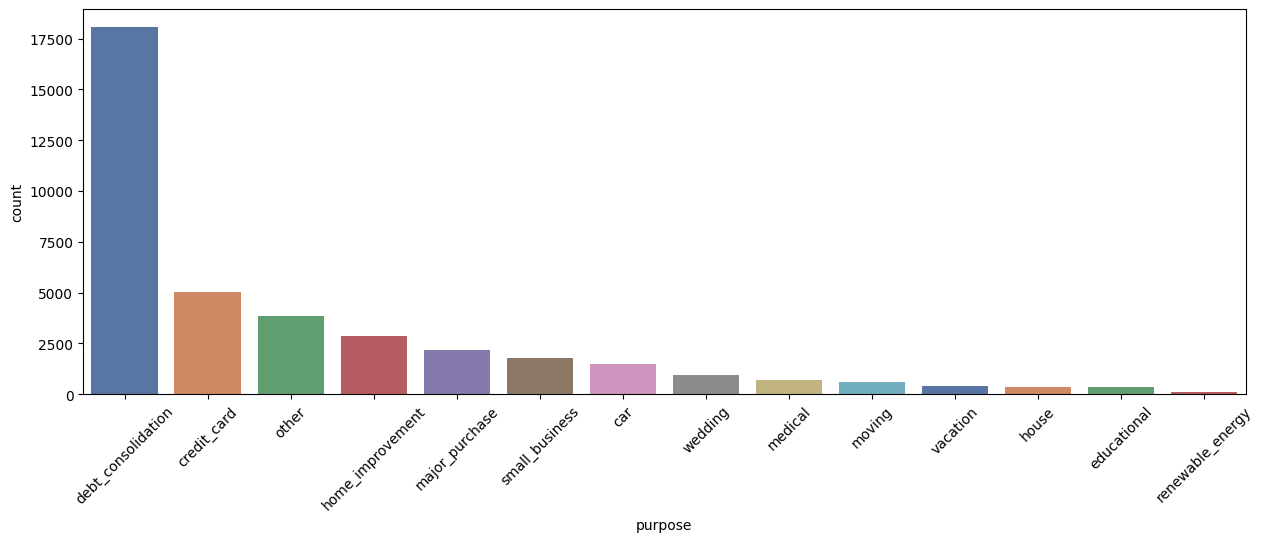

In [51]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='purpose', order = df['purpose'].value_counts().index, palette='deep')
plt.xticks(rotation=45)  
plt.show()

__Observation: The primary purpose of taking a loan is debt_consolidation, followed by credit card and so on.__

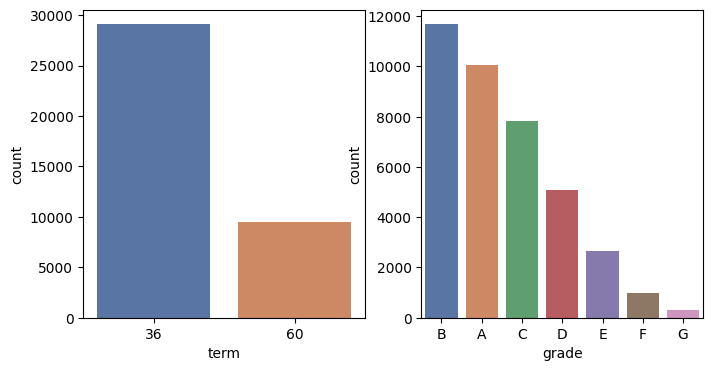

In [52]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
sns.countplot(data=df, x='term', ax=ax[0], palette='deep')
sns.countplot(data=df, x='grade', ax=ax[1], order = df['grade'].value_counts().index, palette='deep')
plt.show()

__Observation: Most of the loans are given for a term of 36 months and are given to A or B grade borrowers.__

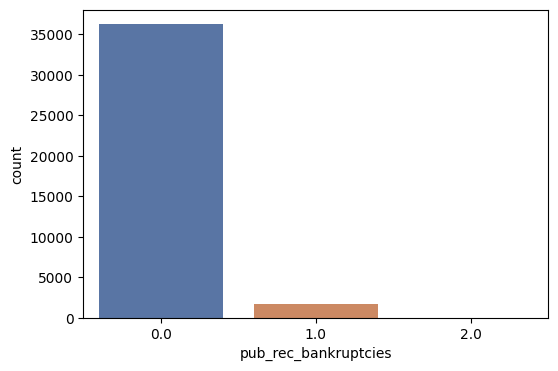

In [53]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='pub_rec_bankruptcies',palette='deep')
plt.show()

__Observation: There are few loans given for already declared bankrupties__

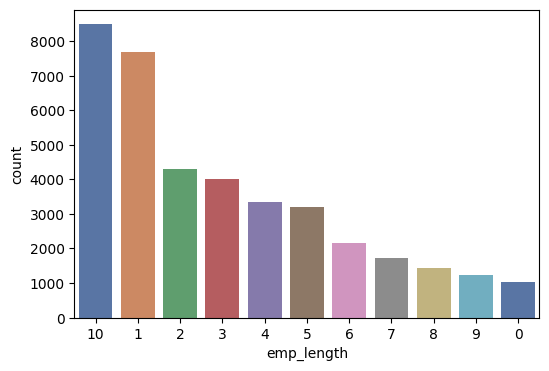

In [54]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='emp_length', order=df['emp_length'].value_counts().index, palette='deep')
plt.show()

__Observation: One clear trend is maximum of loans were associated with 10+ years of emplyoment length. Strangely the number of loans decreased with years of experience__

### Segmented Univariate Analysis

Around 15% loans are charged off or no hope of getting them back . Its almost like default per LC standards. Our Target column is loan_status , so we will try analysing variables affecting the loan_status.

In [55]:
# Converting loan status back to String for easy legend 
df['loan_status'] = df['loan_status'].apply(lambda x: 'Fully Paid' if x==0 else "Charged Off")

In [56]:
# From stackoverflow to print the labels for each data point on bar charts
def print_labels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation using  pyplot
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [57]:
#Since we will be plotting different variables against loan_status, its better to create a common function which can be reused
def analyse_against_loanstatus(df, col, x=12, y=4):
    plt.figure(figsize=(x,y))
    plt.subplot(1, 2, 1)
    loan_dict={1:"Charged Off", 0:"Fully Paid"}
    grouped = df.groupby(['loan_status',col])[col].count()
    count_array = df.groupby(col)[col].count()
    percentages = grouped.unstack() * 100 / count_array.T
    ax = percentages.loc[loan_dict[1]].plot.bar(color=sns.color_palette('husl', 18))
    plt.title(f"%age of loans {loan_dict[1]} vs {col}",fontsize=12)
    ax.set_ylabel('% of loans ' + loan_dict[1],fontsize=12)
    plt.margins(0.2, 0.2)
    print_labels(ax, grouped[loan_dict[1]].to_dict())
    plt.tight_layout()
    plt.show()

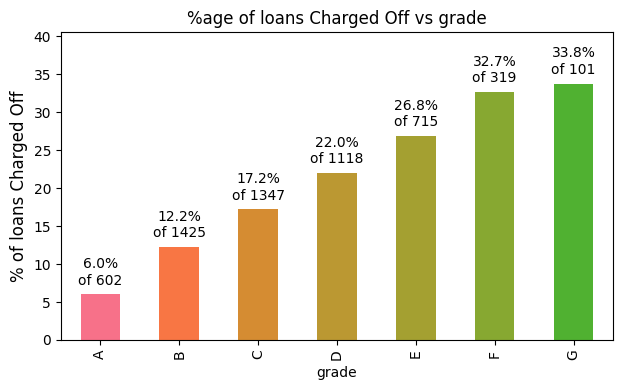

In [58]:
#Analysis of loan grade vs loan status
analyse_against_loanstatus(df,col='grade')

__Observation : Better Loan grade has more chance of getting fully paid and less chance of being charged off__ 

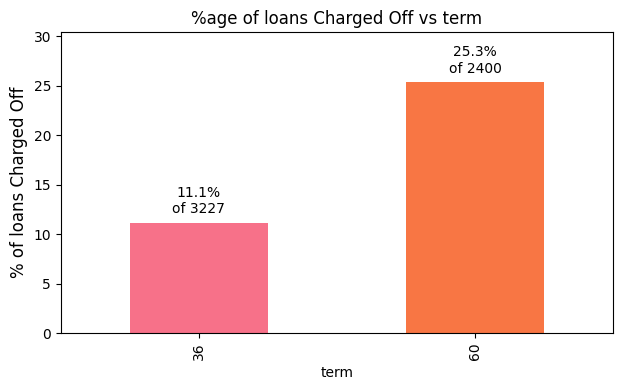

In [59]:
#Analysis of loan term vs loan status
analyse_against_loanstatus(df,col='term')

__Observation: Loan terms of 36 Months has better percentage of getting paid off.__

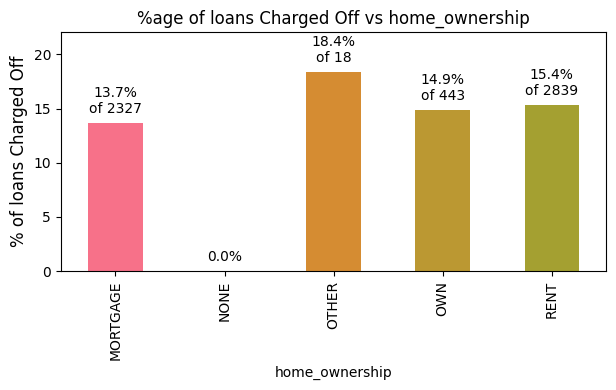

In [60]:
analyse_against_loanstatus(df, col='home_ownership')

__Observation : home_ownership does not have much impact on loan charged off status__

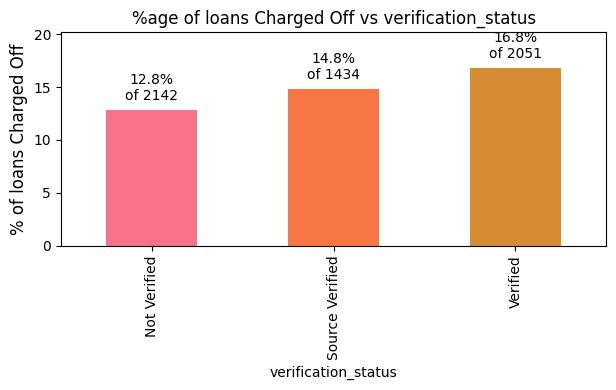

In [61]:
# verification_status:
analyse_against_loanstatus(df, col='verification_status')

__Observation: Its an odd finding that verified loans are more likely to be defaulted ! It could be due to the lesser representation of charged off loans in our dataset.__

Text(0.5, 1.0, 'Interest Rate Trend with Loan Grade')

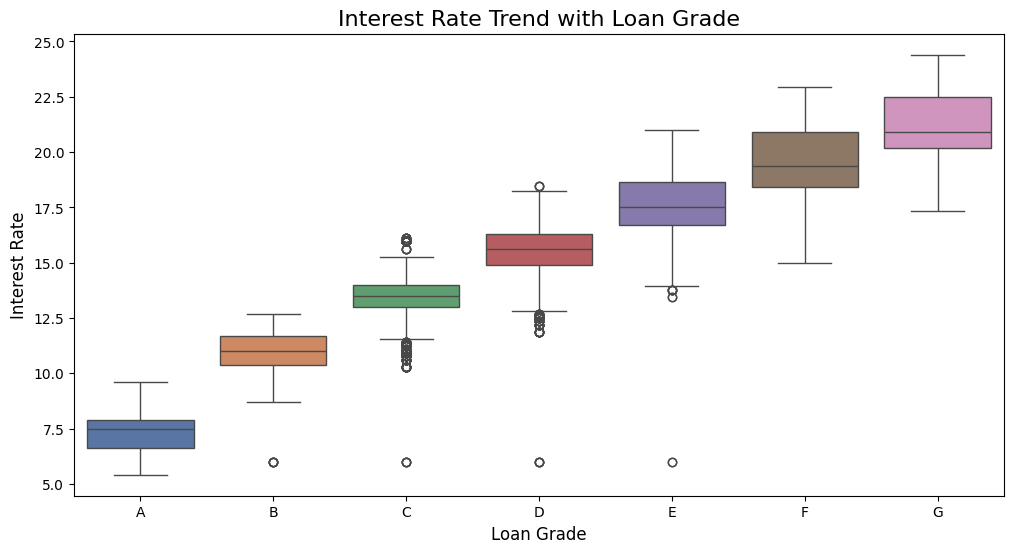

In [62]:
#Int_rate with Grade of the loan
plt.figure(figsize=(12,6))
sns.boxplot(y='int_rate', x='grade', data=df.sort_values('grade'), palette='deep')
plt.ylabel('Interest Rate',fontsize=12)
plt.xlabel('Loan Grade',fontsize=12)
plt.title('Interest Rate Trend with Loan Grade', fontsize=16)

__Observation: Interest rate is higher with bad Loan grades which are more likely to be charged off. We can observe the pattern directly as below__ 

<Axes: xlabel='loan_status', ylabel='installment'>

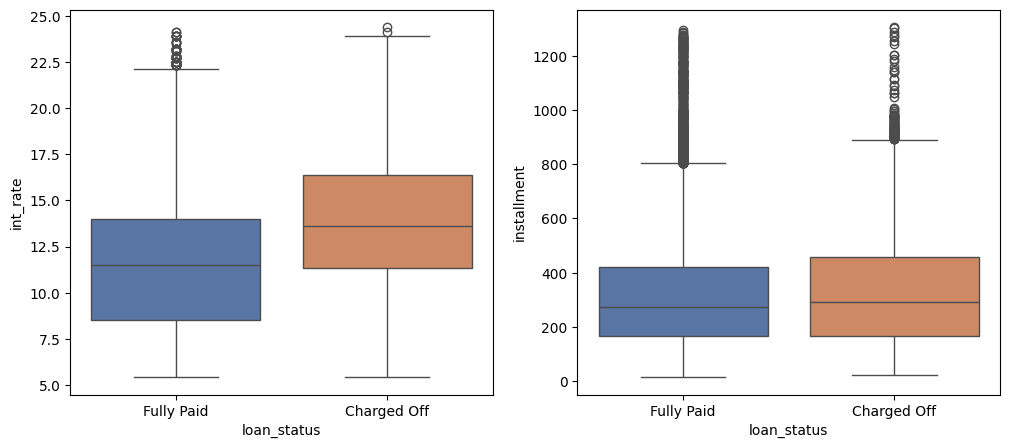

In [63]:
#Plotting interest rate & installment with loan status
fig, ax1 = plt.subplots(1,2,figsize=(12, 5))
sns.boxplot(y='int_rate', x='loan_status', ax=ax1[0], data=df, palette='deep')
sns.boxplot(y='installment', x='loan_status', ax=ax1[1], data=df, palette='deep')

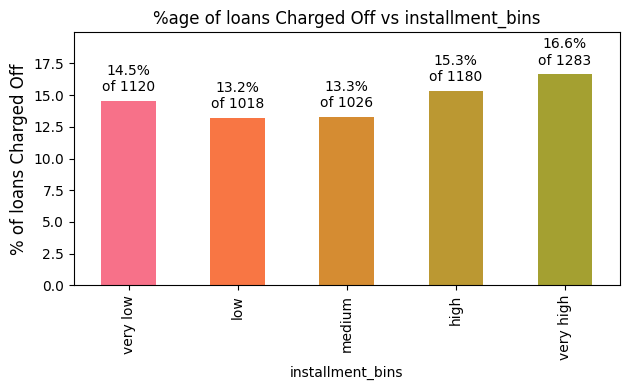

In [64]:
#Analyse binned installment column with loan charged off
analyse_against_loanstatus(df,col='installment_bins')

__Observation: Charged off Loans have higher interest rate & higher installment.__ 

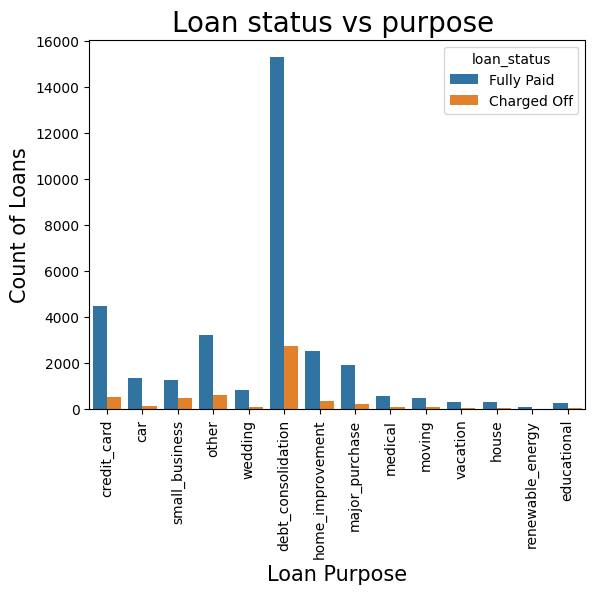

In [65]:
#Purpose and Loan status
sns.countplot(x='purpose', hue="loan_status", data=df)
plt.title("Loan status vs purpose ",fontsize=20)
plt.xlabel("Loan Purpose",fontsize=15)
plt.ylabel("Count of Loans",fontsize=15)
plt.xticks(rotation=90)
plt.show()

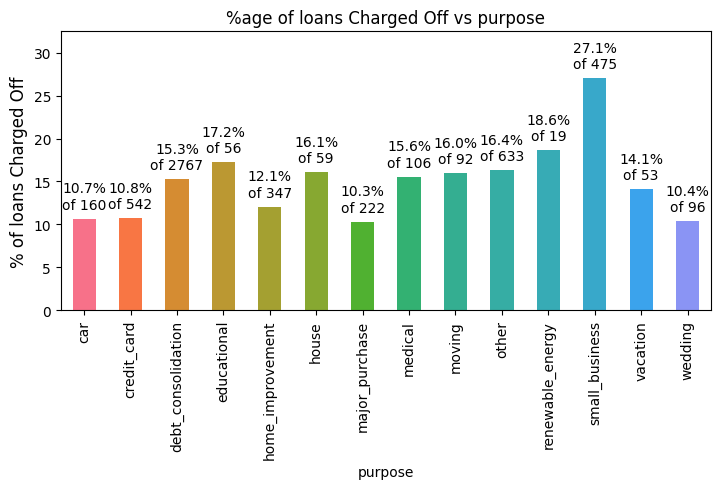

In [66]:
analyse_against_loanstatus(df,col='purpose',x=14,y=5)

__Observation: From above it is clear that Debt Consolidation is the primary reason for a loan. It also has high %age of defaults, however small business loans are most likely to get charged off.__ 

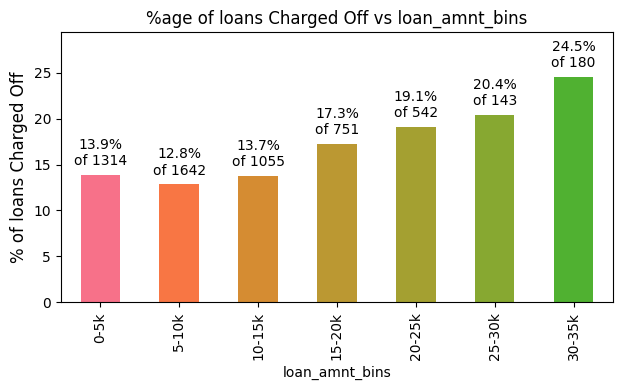

In [67]:
#Applying loan status vs binned loan amount
analyse_against_loanstatus(df,col='loan_amnt_bins')

__Observation: We see the higher loan amount has a greater chance of being charged off.__

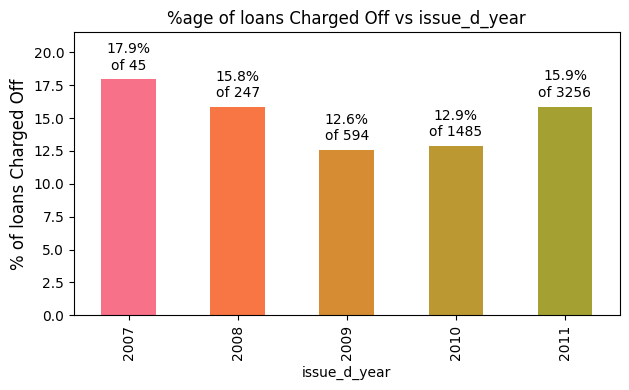

In [68]:
#Charged off loan vs funding year
analyse_against_loanstatus(df,col='issue_d_year')
plt.show()

__Observation: Loans funded during 2007-2008 timeframe have higher charged off , it could be due to recession happening during same period.__

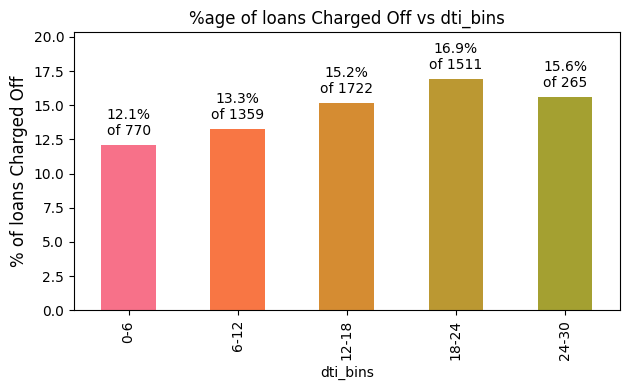

In [69]:
# Analyse dti bins with loan default rate
analyse_against_loanstatus(df, col='dti_bins')

As Per Dictionary, dti is : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
      
__Observation : We can see a general trend of loans being defaulted when dti ratio is higher.__

In [70]:
#pub_rec analysis
df['pub_rec'].value_counts()

pub_rec
0    36507
1     2013
2       48
3        7
4        2
Name: count, dtype: int64

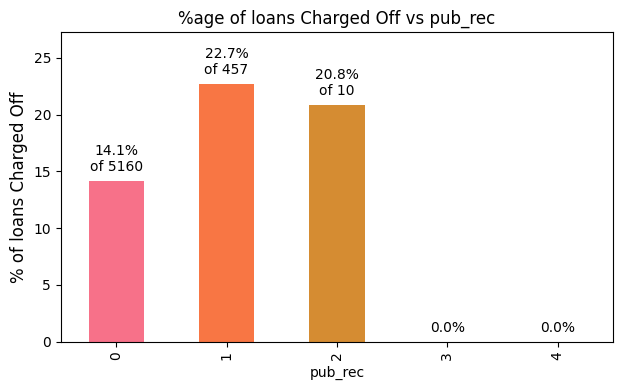

In [71]:
#Plotting pub_rec with Loan charged_off
analyse_against_loanstatus(df,col='pub_rec')

__Observation: Having number of derogatory public records at least 1 increases chances of loans being charged off.__

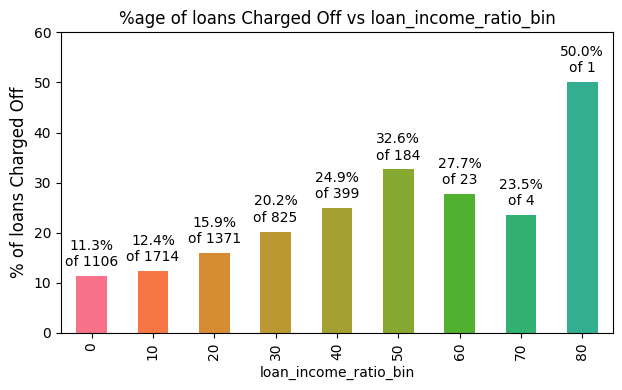

In [72]:
# Derived column : Ratio of loan amount to annual income
df['loan_income_ratio'] = df['loan_amnt'] *10 / df['annual_inc']
df['loan_income_ratio_bin'] = (df['loan_income_ratio'].astype(int)) * 10
analyse_against_loanstatus(df,col='loan_income_ratio_bin')

__Observation: Higher the loan to income ratio , higher the chances of loan getting default. We can see its increasing trend till 50% ratio and we see the trend declining is actually because there are very less loans offered__

Let us try to find the impact of all the numeric columns on the loans getting charged off using subplots in one go

In [73]:
cols_to_check = df.select_dtypes('number').columns
temp = df.groupby('loan_status')[cols_to_check].mean()

In [74]:
len(cols_to_check)

20

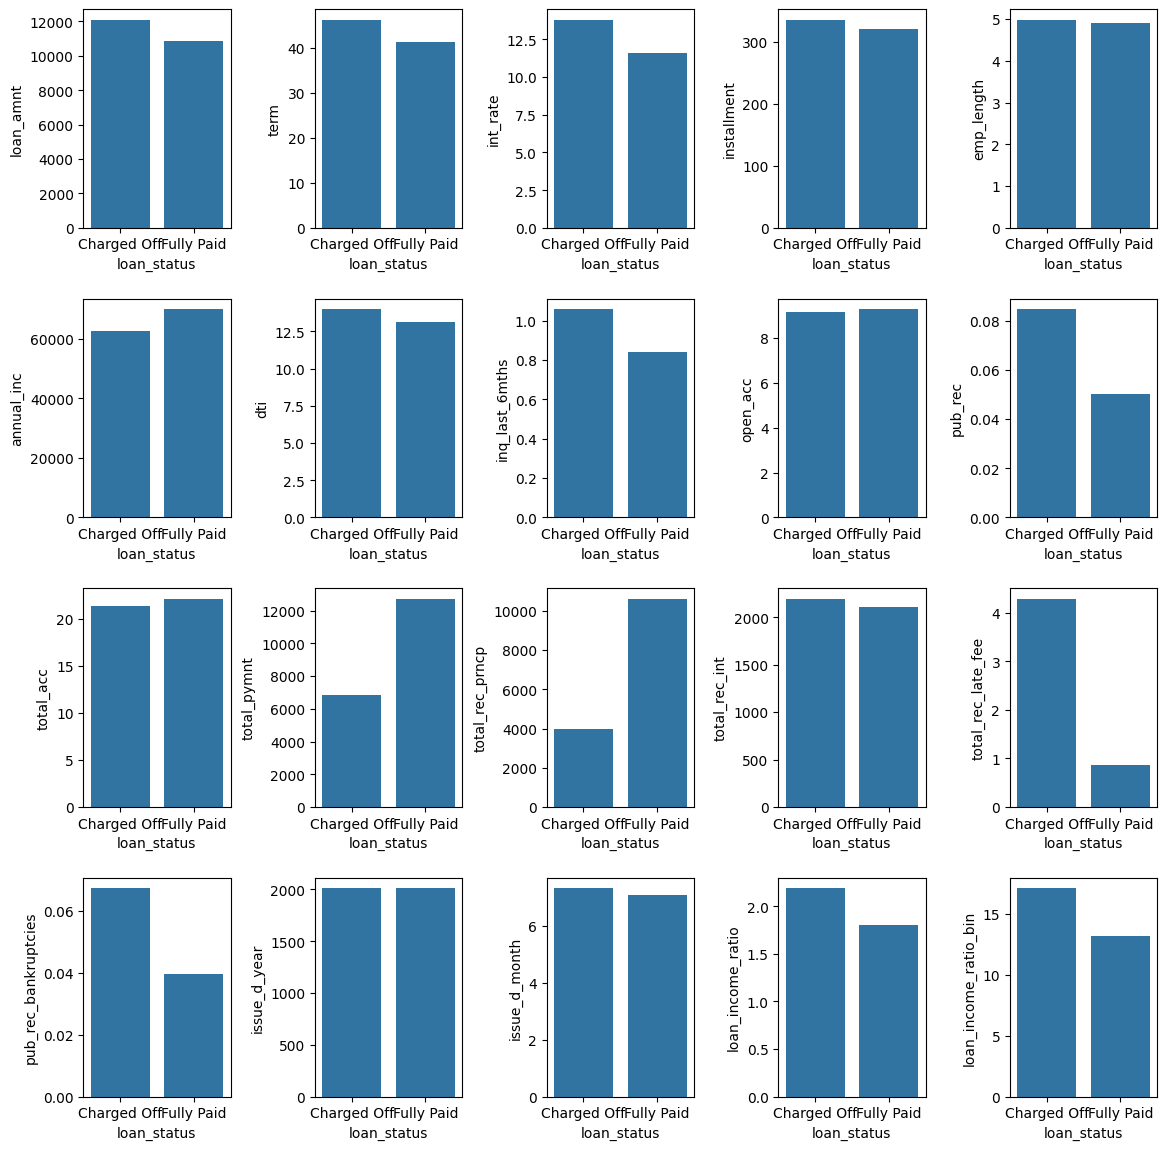

In [75]:
fig, ax = plt.subplots(4,5, figsize=(12,12))
fig.tight_layout(pad=3.0)
for i in range(4):
    for j in range(5):
        if(5*i + j < len(cols_to_check)):
            sns.barplot(data=temp, x='loan_status', y=cols_to_check[5*i + j], ax=ax[i][j])
        else:
            ax[i][j].axis('off') #to turn off the empty grid display if no of subplots to display < nrow*ncols 

__Observation: The above plots clearly show that high values of loan-amount, term, interest-ratec, installment, dti etc are associated with charged-off loans.__

### Bivariate Analysis

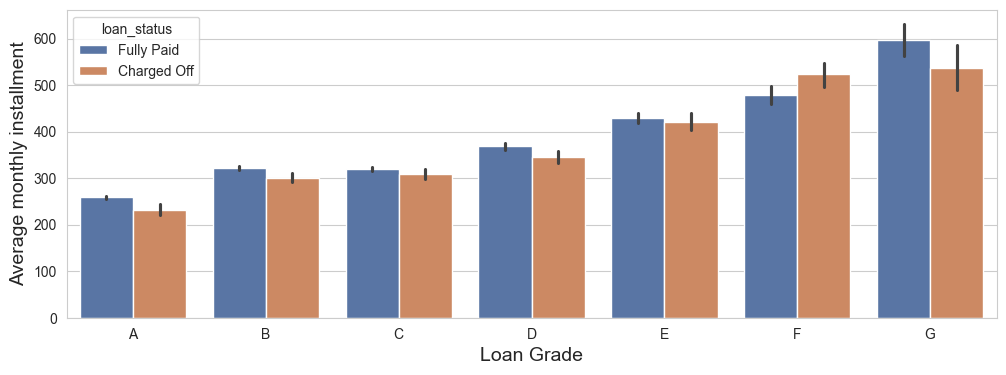

In [76]:
plt.figure(figsize=(12,4))
sns.set_style('whitegrid')
sns.barplot(data = df.sort_values('grade'), x = 'grade', y = 'installment', hue = 'loan_status', palette="deep")
plt.ylabel("Average monthly installment",fontsize=14)
plt.xlabel("Loan Grade",fontsize=14)
plt.show()

__Observation : Loans with lower grade have higher average monthly installment and thus more likely to be charged off.__

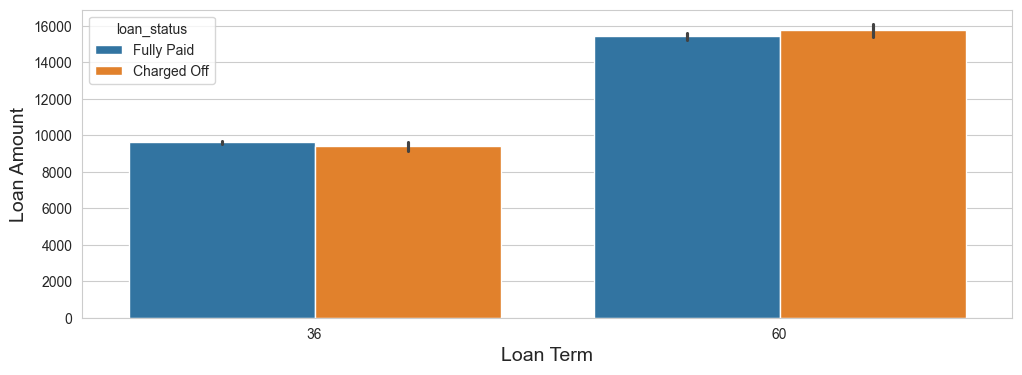

In [77]:
plt.figure(figsize=(12,4))
sns.set_style('whitegrid')
sns.barplot(data = df, x='term', y='loan_amnt', hue="loan_status")
plt.ylabel("Loan Amount",fontsize=14)
plt.xlabel("Loan Term",fontsize=14)
plt.show()

__Observation : Higher loan term is associated with a higher loan amount and more likely to be charged off.__

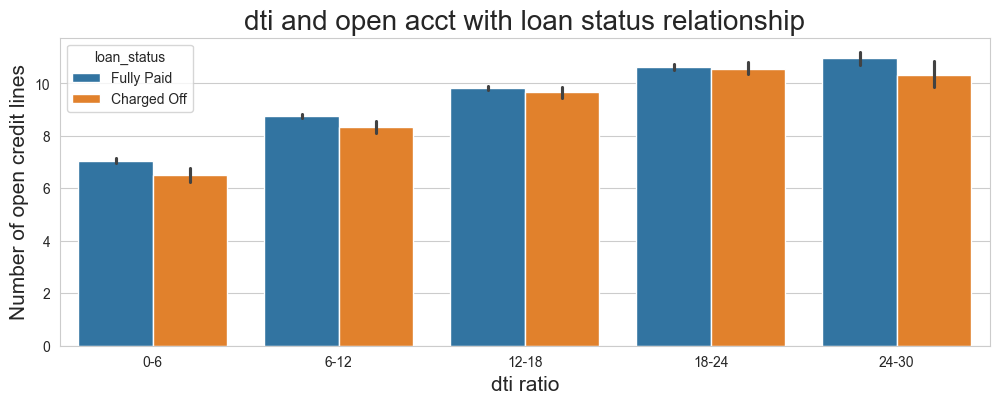

In [78]:
#dti and open acct with loan status relationship
plt.figure(figsize=(12,4))
sns.barplot(x='dti_bins', y='open_acc', hue='loan_status',data=df, estimator=np.mean)
plt.title("dti and open acct with loan status relationship",fontsize=20)
plt.xlabel("dti ratio",fontsize=15)
plt.ylabel("Number of open credit lines",fontsize=15)
plt.show()

__Observation:Number of open credit accts and debt to income ratio goes hand in hand while together they dont differentiate between fully paid or default loans.__

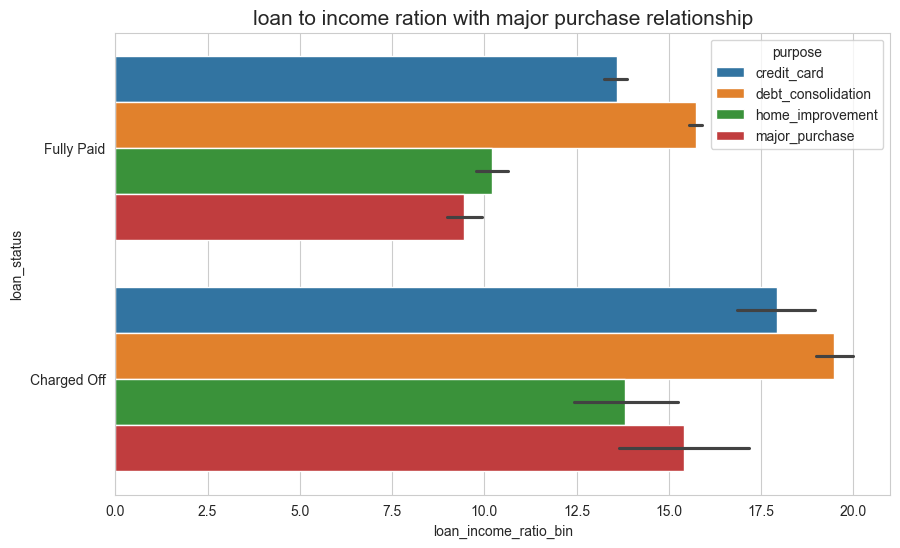

In [79]:
# keeping purpose of loan (constant) and another categorical variables  for bivariate analysis
plt.figure(figsize=[10,6])
major_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df_temp = df[df.purpose.isin(major_purposes)]
sns.barplot(y='loan_status', x="loan_income_ratio_bin", hue='purpose', data=df_temp)
plt.title("loan to income ration with major purchase relationship",fontsize=15)
plt.show()

__Observation: People with high loan_amt to annual income ratio has higher tendency to Default. Intersting find is they do more major purchases compared to that of fully paid__

### Final Conclusions

- LC assigns loan grades from A to G, with a higher likelihood of default as the grade descends. Grades F and G, in particular, see over 30% of loans being charged off.
- Loans with a 36-month term exhibit a better payoff percentage compared to those with a 60-month term, where defaulters are more common.
- Interest rates impact loan defaults, with higher rates correlating to increased charge-offs.
- Installment amounts are higher for charged-off loans.
- Debt consolidation is the most common loan purpose and also accounts for the highest number of defaults.
- Higher loan amounts are associated with a greater likelihood of charge-offs.
- Debt-to-income ratio (DTI) influences loan defaults, with higher DTIs indicating a greater chance of default.
- The loan-to-income ratio is positively correlated with loan default probability.
- For high values of 'dti' & 'installment', the probability of a charged-off loan is also comparatively high